# Campaign, Deployments, Events objects - demo

`pynsitu.events` implements a range of objects that are useful for the analysis of in situ experiments. From high to low levels:

- `Campaign`: this object holds data describing an in situ campaign. Data is typically stored in a yaml file.
It is composed of `Deployments` objects, `Platforms` information and relevant meta data.
- `Platform`: A platform object contains `Deployments`, `Sensors` and meta data
- `Deployments`: collection of `Deployments`
- `Deployment`: single deployment with temporal and geographical start/end information and meta data.
- `Event`: An event is an atom used to describe deployments. It contains four elementary information: label, longitude, latitude, time.

In [1]:
import pynsitu as pin

---

## Campaign


Start from high level and go down.
Top most objects are `Campaign` objects which are provided in a yaml file:


In [2]:
cp = pin.Campaign("../pynsitu/tests/campaign.yaml")
cp

Campaign(drixmed22 2022/09/21 to 2022/09/25)

Iterating over a `Campaign` returns a mix of `Deployments` and `Platform` objects:

In [3]:
for i in cp:
    print(i, type(cp[i]))

underway <class 'pynsitu.events.Deployment'>
tide_gauge <class 'pynsitu.events.Platform'>
europe <class 'pynsitu.events.Platform'>
drix <class 'pynsitu.events.Platform'>
drifter0 <class 'pynsitu.events.Platform'>
drifter1 <class 'pynsitu.events.Platform'>
drifter2 <class 'pynsitu.events.Platform'>
drifter3 <class 'pynsitu.events.Platform'>
drifter4 <class 'pynsitu.events.Platform'>
drifter5 <class 'pynsitu.events.Platform'>


Iterating over all `Deployment` is performed with:

In [4]:
for label, deployment, platform, sensor, meta in cp.get_all_deployments():
    print(label, platform, sensor, deployment)

underway None None underway / start 2022-09-21 06:30:00 / end 2022-09-25 15:10:00
laseyne tide_gauge None laseyne / start 2022-09-20 17:48:30 5.89 43.11 / end 2022-09-21 04:50:00 5.89 43.11
fos0 tide_gauge None fos0 / start 2022-09-23 19:35:45 4.89 43.39 / end 2022-09-24 11:59:00 4.89 43.39
fos1 tide_gauge None fos1 / start 2022-09-24 13:24:30 4.90 43.38 / end 2022-09-24 15:16:00 4.90 43.38
calibration_ligne1 europe adcp calibration_ligne1 / start 2022-09-21 08:09:30 / end 2022-09-21 08:31:00
calibration_ligne2 europe adcp calibration_ligne2 / start 2022-09-21 08:32:44 / end 2022-09-21 08:52:00
calibration_ligne3 europe adcp calibration_ligne3 / start 2022-09-21 08:52:35 / end 2022-09-21 09:10:00
calibration_ligne4 europe adcp calibration_ligne4 / start 2022-09-21 09:10:23 / end 2022-09-21 09:26:00
d0 europe adcp d0 / start 2022-09-21 18:26:00 / end 2022-09-22 12:42:00
d1 europe adcp d1 / start 2022-09-22 20:57:22 / end 2022-09-23 14:16:20
d2 europe adcp d2 / start 2022-09-23 15:54:46 

Select a single `Deployment`:

In [5]:
cp["underway"]

Deployment(underway / start 2022-09-21 06:30:00 / end 2022-09-25 15:10:00)

Select a single `Platform`:

In [6]:
for s in cp["europe"].sensors():
    print(s)

adcp
ctd


In [7]:
print(cp["europe"])
print(cp["drix"])

Platform europe
 sensors: adcp / ctd

Platform drix
 sensors: adcp / ctd



Loop over all sensors of a `Platform`:

In [8]:
for s in cp["drix"].sensors():
    print(s)

adcp
ctd


Note: you can access sensor `Deployments` object with `cp["drix"][s]`

Select a single `Sensor` and a sensor `Deployment`:

In [9]:
cp["europe"]["adcp"]

Deployments(adcp
calibration_ligne1
calibration_ligne2
calibration_ligne3
calibration_ligne4
d0
d1
d2
d3)

Loop over all sensor `Deployment` objects:

In [10]:
for label, d in cp["europe"]["adcp"].items():
    print(label, ":", d)

calibration_ligne1 : calibration_ligne1 / start 2022-09-21 08:09:30 / end 2022-09-21 08:31:00
calibration_ligne2 : calibration_ligne2 / start 2022-09-21 08:32:44 / end 2022-09-21 08:52:00
calibration_ligne3 : calibration_ligne3 / start 2022-09-21 08:52:35 / end 2022-09-21 09:10:00
calibration_ligne4 : calibration_ligne4 / start 2022-09-21 09:10:23 / end 2022-09-21 09:26:00
d0 : d0 / start 2022-09-21 18:26:00 / end 2022-09-22 12:42:00
d1 : d1 / start 2022-09-22 20:57:22 / end 2022-09-23 14:16:20
d2 : d2 / start 2022-09-23 15:54:46 / end 2022-09-23 17:28:25
d3 : d3 / start 2022-09-25 05:25:12 / end 2022-09-25 10:55:49


Select a single `Deployment`

In [11]:
cp["europe"]["adcp"]["d0"]

Deployment(d0 / start 2022-09-21 18:26:00 / end 2022-09-22 12:42:00)

In [12]:
print(cp["europe"])

Platform europe
 sensors: adcp / ctd



### show Campaign timeline

<AxesSubplot: title={'center': 'drixmed22'}>

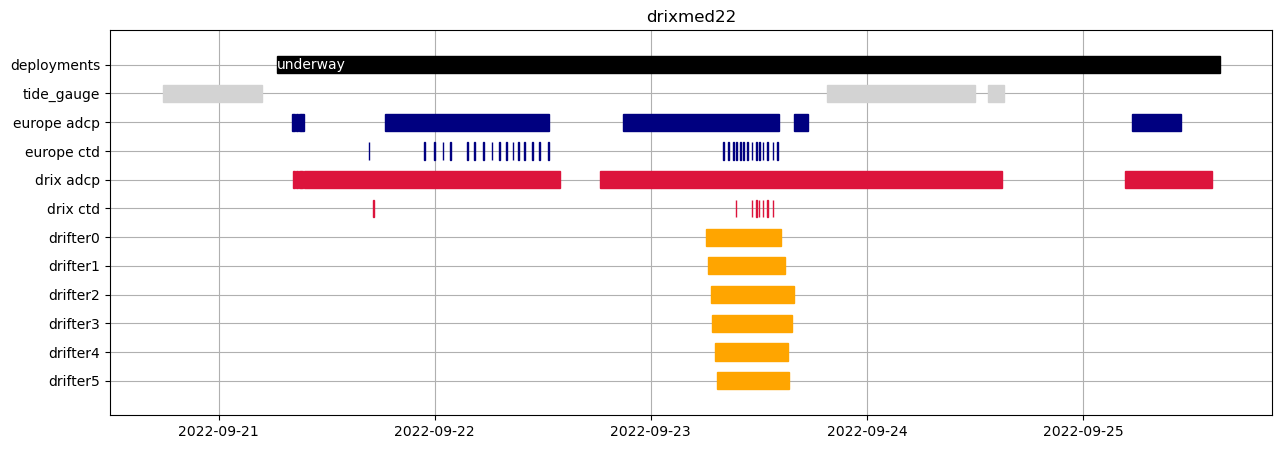

In [13]:
cp.timeline()

---
## make maps

Link to bathymetric datasets:

- [ETOPO](https://www.ncei.noaa.gov/products/etopo-global-relief-model)

The local path to any dataset used by `pynsitu` should be specied in the `~/.config/pynsitu/pynsitu.yaml` file.


### with cartopy

without bathymetry:

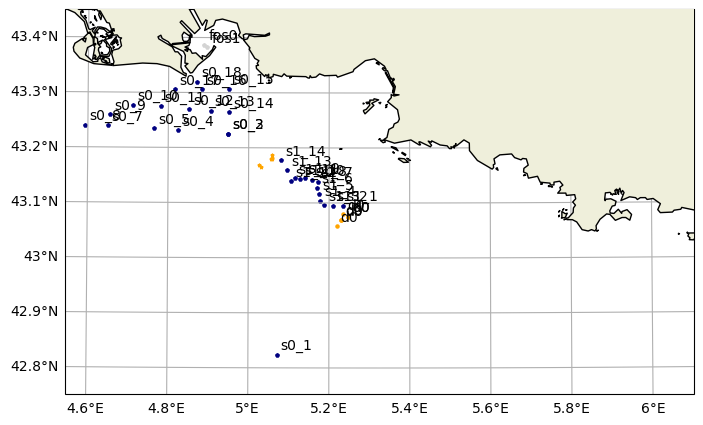

In [18]:
fig, ax, cbar = cp.map(bathy=False, coastline="h")  # bathy_fill=False,

# add all deployments
for label, deployment, platform, sensor, meta in cp.get_all_deployments():
    if "color" in meta:
        c = meta["color"] if "color" in meta else "0.5"
    deployment.plot_on_map(ax, color=c, label=True, label_xyshift=(0.01, 0.01))

with bathymetric file (see `pynsitu/tests/campaign.yaml`)

/Users/aponte/.miniconda3/envs/pynsitu/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'lw'
  result = super().contour(*args, **kwargs)


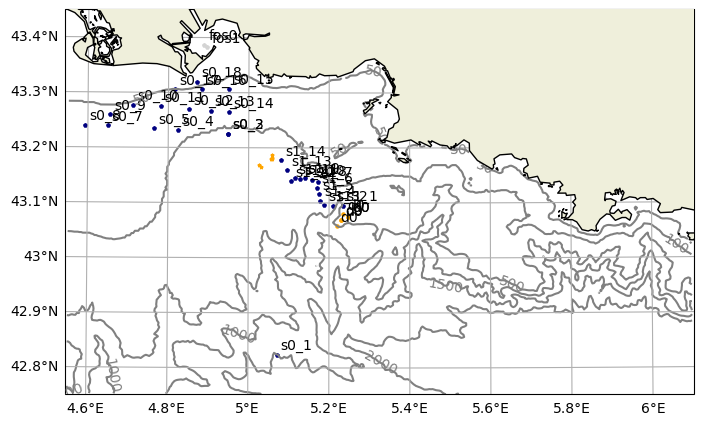

In [14]:
fig, ax, cbar = cp.map(bathy_fill=False, coastline="h")

# add all deployments
for label, deployment, platform, sensor, meta in cp.get_all_deployments():
    if "color" in meta:
        c = meta["color"] if "color" in meta else "0.5"
    deployment.plot_on_map(ax, color=c, label=True, label_xyshift=(0.01, 0.01))

varition with colors:

/Users/aponte/.miniconda3/envs/pynsitu/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'lw'
  result = super().contour(*args, **kwargs)


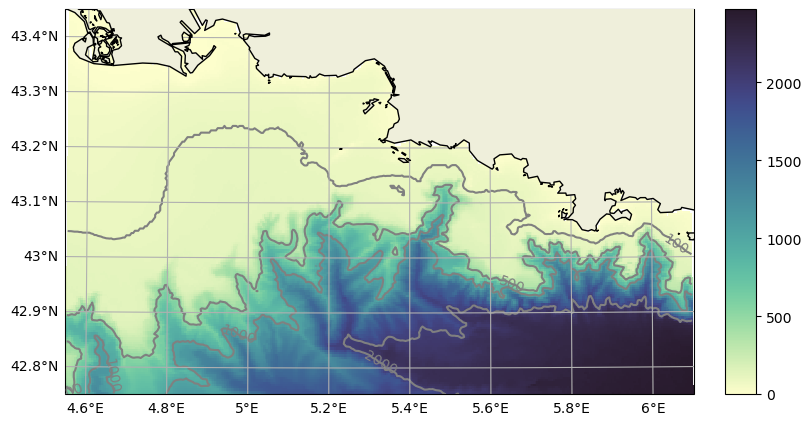

In [15]:
cp.map(coastline="h", bathy_levels=[0, 100, 500, 1000, 2000], bathy_fill=True);

### with folium

See 

In [16]:
cp.map_folium()